# **CREDIT SCORE CLASSIFICATION MODEL DEVELOPMENT**

![alt the text here](https://img.freepik.com/free-vector/hand-drawn-credit-score-concept_23-2149164575.jpg?w=900&t=st=1725263174~exp=1725263774~hmac=197f3bc36eb5de8aa69feb5e64d9e8d59bbc6d5c7073f6ecda5fba4e53e791f0)



*   **Importing libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



 *   **Uploading Encoded data set**





In [2]:
data=pd.read_csv('/content/NEW_ENCODED(10R)_CREDIT_DATA.csv')
data.head()

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,2,312.494089,0
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,3,284.629162,0
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,4,331.209863,0
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,5,223.451310,0
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,1,341.489231,0


In [3]:
data.columns

Index(['Age', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# **FEATURE ENGINEERING**

**1. Debt-to-Income Ratio**

In [7]:
data['Debt-to-Income Ratio']=data['Monthly_Inhand_Salary'] / data['Credit_Utilization_Ratio']



*   This ratio helps to understand the balance between income and credit utilization, indicating how leveraged the individual is. A higher DTI might signal financial instability.



**2.Credit Age in Years**

In [8]:
data['Credit_Age_Years'] = data['Credit_History_Age'] / 12



*   This feature converts the credit history age from months to years, making it easier to interpret for modeling. A longer credit history generally indicates more experience with managing credit.



**3. Monthly Credit Availability**

In [9]:
data['Monthly_Credit_Availability'] = data['Monthly_Inhand_Salary'] - data['Credit_Utilization_Ratio']



*   This represents the amount of income left after accounting for credit usage. It can serve as a proxy for how much credit is left over after financial obligations are met.



In [10]:
data.head()

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Debt-to-Income Ratio,Credit_Age_Years,Monthly_Credit_Availability
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,2,312.494089,0,68.033748,22.083333,1798.020714
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,3,284.629162,0,57.124608,22.166667,1792.898373
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,4,331.209863,0,63.784854,22.250000,1796.233981
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,5,223.451310,0,58.157033,22.333333,1793.465471
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,1,341.489231,0,73.590265,22.416667,1800.045986


In [11]:
data.shape

(100000, 13)

# **CHI-SQUARE TEST & ANOVA**

In [12]:
from scipy.stats import chi2_contingency, f_oneway

In [13]:
target = 'Credit_Score'

In [14]:
new_features =['Debt-to-Income Ratio','Monthly_Credit_Availability','Credit_Age_Years',]

In [15]:
def chi_square_test(feature, target, data):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

In [16]:
chi_square_results = {feature: chi_square_test(feature, target, data) for feature in new_features}

In [17]:
print("Chi-Square Test Results:")
for feature, result in chi_square_results.items():
    print(f"{feature}: Chi2 = {result[0]}, p-value = {result[1]}")

Chi-Square Test Results:
Debt-to-Income Ratio: Chi2 = 200000.00000000003, p-value = 0.49831791267991116
Monthly_Credit_Availability: Chi2 = 199999.9999999999, p-value = 0.4983179126799846
Credit_Age_Years: Chi2 = 18640.171143860578, p-value = 0.0




*   Debt-to-Income Ratio : The p-value of 0.4983 is much greater than the typical significance level (e.g., 0.05), suggesting that there is no significant relationship between the Debt-to-Income Ratio and the dependent variable being tested.



*   Monthly Credit Availability: The result is nearly identical to Debt-to-Income Ratio, with a p-value of 0.4983, which again indicates that this feature does not show a statistically significant relationship with the target variable.

*   Credit Age in Years:A p-value of 0.0 indicates that the relationship between Credit Age in Years and the target variable is highly significant.





**ANOVA**

In [18]:
def anova_test(feature, target, data):
    groups = [data[data[target] == value][feature].values for value in data[target].unique()]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

In [19]:
anova_results = {feature: anova_test(feature, target, data) for feature in new_features}


In [20]:
print("\nANOVA Test Results:")
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result[0]}, p-value = {result[1]}")



ANOVA Test Results:
Debt-to-Income Ratio: F-statistic = 2142.707793401014, p-value = 0.0
Monthly_Credit_Availability: F-statistic = 2330.4122020772716, p-value = 0.0
Credit_Age_Years: F-statistic = 8903.663444157108, p-value = 0.0


# **Removing Unwanted Columns**

In [21]:
significant_features = [feature for feature in new_features if chi_square_results[feature][1] < 0.05
                        and anova_results[feature][1] < 0.05]
data = data.drop(columns=[feature for feature in new_features if feature not in significant_features])

In [22]:
data.head()

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,2,312.494089,0,22.083333
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,3,284.629162,0,22.166667
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,4,331.209863,0,22.250000
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,5,223.451310,0,22.333333
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,1,341.489231,0,22.416667




*   Remove non-significant columns based on the Chi-Square test results



In [23]:
data.columns

Index(['Age', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_Age_Years'],
      dtype='object')

In [24]:
data.value_counts('Credit_Score')

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [25]:
from google.colab import files

data.to_csv('NEW_FEATURE_DATASET(11R).CSV',index=False)
files.download('NEW_FEATURE_DATASET(11R).CSV')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 **SCALING the data after feature engineering**



*   STANDARDSCALAR



In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
sc_data=sc.fit_transform(data)

In [28]:
datascaled_new=pd.DataFrame(sc_data)
datascaled_new.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.958344,-0.744544,-1.319266,-1.221347,-1.012183,-1.067562,0.439200,-0.409455,-0.397733,-1.769439,0.439200
1,-0.958344,-0.744544,-1.319266,-1.221347,-1.493173,-0.066489,0.449232,0.127796,-0.535916,-1.769439,0.449232
2,-0.958344,-0.744544,-1.319266,-1.221347,-1.012183,-0.718376,0.459264,0.665046,-0.304920,-1.769439,0.459264
3,-0.958344,-0.744544,-1.319266,-1.086253,-1.493173,-0.177318,0.469296,1.202296,-0.839300,-1.769439,0.469296
4,-0.958344,-0.744544,-1.319266,-1.018705,-1.493173,-1.463366,0.479328,-0.946705,-0.253945,-1.769439,0.479328


In [29]:
data.columns

Index(['Age', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_Age_Years'],
      dtype='object')

# **MODEL CREATION**



*   first split of data( independend and dependent)



In [30]:
y=data['Credit_Score']
x=data.drop(['Credit_Score'],axis=1)



*   second split of data( train and test)



In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


# **(1)LOGISTIC REGRESSION**

In [33]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [34]:
log_model.fit(X_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_prediction=log_model.predict(X_test)



*   classification_report, precision_score, recall_score, f1_score



In [36]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix,accuracy_score


In [37]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

           0       0.48      0.21      0.29      3527
           1       0.60      0.41      0.49      5874
           2       0.58      0.79      0.67     10599

    accuracy                           0.58     20000
   macro avg       0.55      0.47      0.48     20000
weighted avg       0.57      0.58      0.55     20000



In [38]:
confusion_matrix(y_test,y_prediction)


array([[ 745,   59, 2723],
       [ 178, 2408, 3288],
       [ 630, 1577, 8392]])

# **(2)KNN CLASSIFIER**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
metrics_k=[]
neighbors=np.arange(1,15)

In [40]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_prediction=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_prediction)
    metrics_k.append(acc)

metrics_k

[0.66265,
 0.61855,
 0.6391,
 0.6254,
 0.6248,
 0.6225,
 0.61885,
 0.61455,
 0.6133,
 0.61315,
 0.6085,
 0.6103,
 0.6063,
 0.6048]

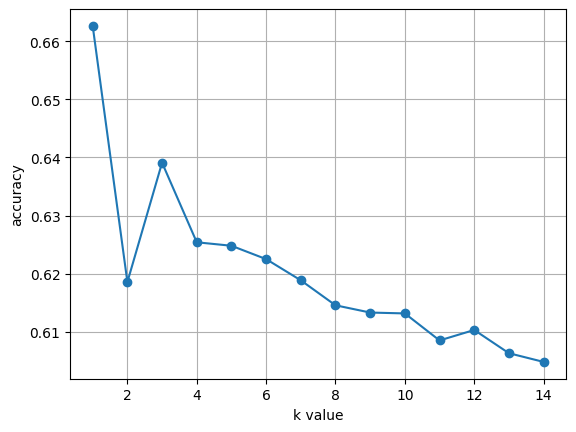

In [41]:
plt.plot(neighbors,metrics_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [42]:
classifier=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
classifier.fit(X_train,y_train)
y_prediction=classifier.predict(X_test)
acc=accuracy_score(y_test,y_prediction)


In [43]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56      3527
           1       0.66      0.66      0.66      5874
           2       0.70      0.70      0.70     10599

    accuracy                           0.66     20000
   macro avg       0.64      0.64      0.64     20000
weighted avg       0.66      0.66      0.66     20000



# **(3)DECISION TREE**

In [44]:
from sklearn.tree import DecisionTreeClassifier
ds_clf=DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
y_prediction=ds_clf.predict(X_test)

In [46]:
print(confusion_matrix(y_test,y_prediction))

[[2153  155 1219]
 [ 158 3928 1788]
 [1239 1716 7644]]


In [47]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      3527
           1       0.68      0.67      0.67      5874
           2       0.72      0.72      0.72     10599

    accuracy                           0.69     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.69      0.69      0.69     20000



**(4)RANDOM FOREST CLASSIFIER**

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_prediction_rf=rf_clf.predict(X_test)


In [51]:
print(confusion_matrix(y_test,y_prediction_rf))


[[2366   35 1126]
 [ 116 4527 1231]
 [ 760 1396 8443]]


In [53]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction_rf, average='weighted')
recall = recall_score(y_test, y_prediction_rf, average='weighted')
f1 = f1_score(y_test, y_prediction_rf, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      3527
           1       0.76      0.77      0.77      5874
           2       0.78      0.80      0.79     10599

    accuracy                           0.77     20000
   macro avg       0.76      0.75      0.75     20000
weighted avg       0.77      0.77      0.77     20000





*   Random Forest classifier gives more accuracy . so we select Random Forest Model.

